In [2]:
import pandas as pd

# Raw link of the CSV file
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)


In [3]:
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
360,15577514,Male,43,129000,1
324,15575247,Female,48,131000,1
344,15729908,Male,47,105000,1


In [4]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.sample(2)

,Age,EstimatedSalary,Purchased
7,32,150000,1
78,28,87000,0


In [6]:
X = df.iloc[:,0:2]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Train test split

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.3)

In [9]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

Standard Scale

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
scaler.fit(X_train) # Fit scaler to trin set , it will learn the parameters (basically ye mean or standard deviation find karta hai)

,copy,True
,with_mean,True
,with_std,True


In [12]:
scaler.mean_ #3.71178571e+01:Age, 7.14392857e+04: Salary

array([3.78071429e+01, 7.09250000e+04])

hamesha hum training se sikhte hai or transform karte hai train or test donon ko

In [13]:
# transformed train and test sets
X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [14]:
X_train_Scaled # yahi problem hai , it takes df(X_train) and give np.array

array([[-1.73445194e+00,  9.07538603e-02],
       [ 1.67461926e+00,  1.74350709e+00],
       [-9.55235665e-01, -3.51947897e-01],
       [ 2.16162943e+00,  3.56374915e-01],
       [-7.60431596e-01, -2.63407546e-01],
       [ 1.87846780e-02, -4.70001699e-01],
       [-1.53964787e+00, -2.33894095e-01],
       [-2.73421425e-01,  3.17269593e-02],
       [-1.05263770e+00,  3.85888365e-01],
       [ 1.67461926e+00, -9.42216907e-01],
       [ 2.13588747e-01, -4.10974798e-01],
       [-9.55235665e-01,  2.38321113e-01],
       [-1.05263770e+00, -3.81461348e-01],
       [ 1.38241316e+00,  5.62969068e-01],
       [-8.57833630e-01, -8.24163105e-01],
       [ 6.03196884e-01,  2.00912814e+00],
       [ 2.13588747e-01, -7.06109303e-01],
       [-1.24744177e+00,  2.67834563e-01],
       [-1.05263770e+00, -1.59151282e+00],
       [-1.63704990e+00, -1.62102627e+00],
       [-2.73421425e-01,  1.20267311e-01],
       [ 1.28501112e+00,  2.21572230e+00],
       [-2.73421425e-01,  1.79294212e-01],
       [ 3.

In [15]:
X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [16]:
X_train_Scaled.sample(3)

,Age,EstimatedSalary
195,-0.176019,2.156695
163,1.869423,-0.322434
232,0.018785,-0.617569


In [17]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.807143,70925.000000
std,10.285109,33943.523883
min,18.000000,15000.000000
25%,30.000000,44000.000000
50%,37.000000,71000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [18]:
X_train_Scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,6.344132e-18,-3.172066e-18
std,1.001791e+00,1.001791e+00
min,-1.929256e+00,-1.650540e+00
25%,-7.604316e-01,-7.946497e-01
50%,-7.861736e-02,2.213509e-03
75%,7.980010e-01,5.039422e-01
max,2.161629e+00,2.333776e+00


In [20]:
import numpy as np
np.round(X_train_Scaled.describe(),1)
# mean = 0 , std = 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.7
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effecting of scaling

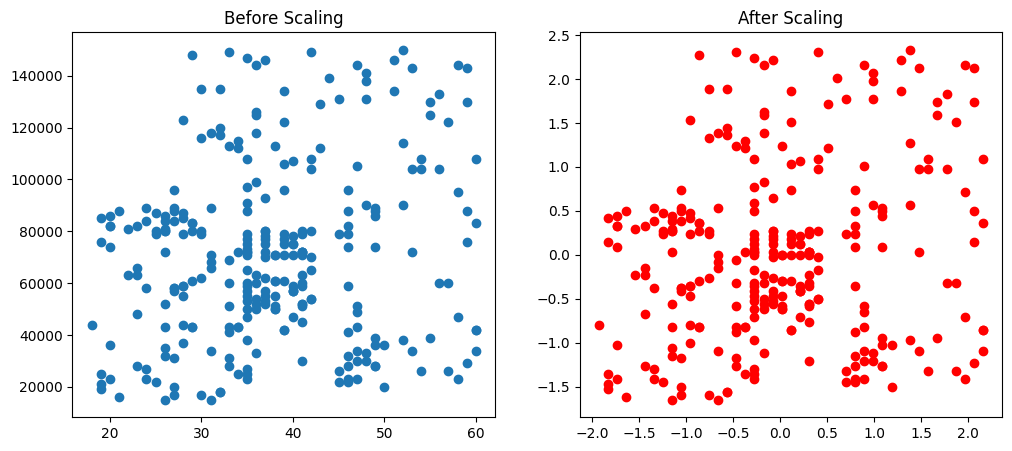

In [21]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled['Age'], X_train_Scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

bas mean centerd ho gaya or x,y-axix normalized ho gaya

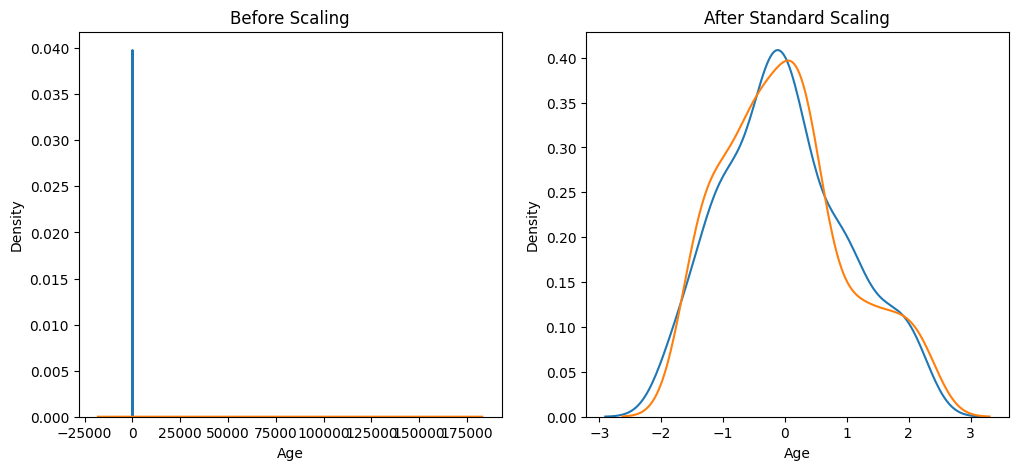

In [22]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparision Of destributiom

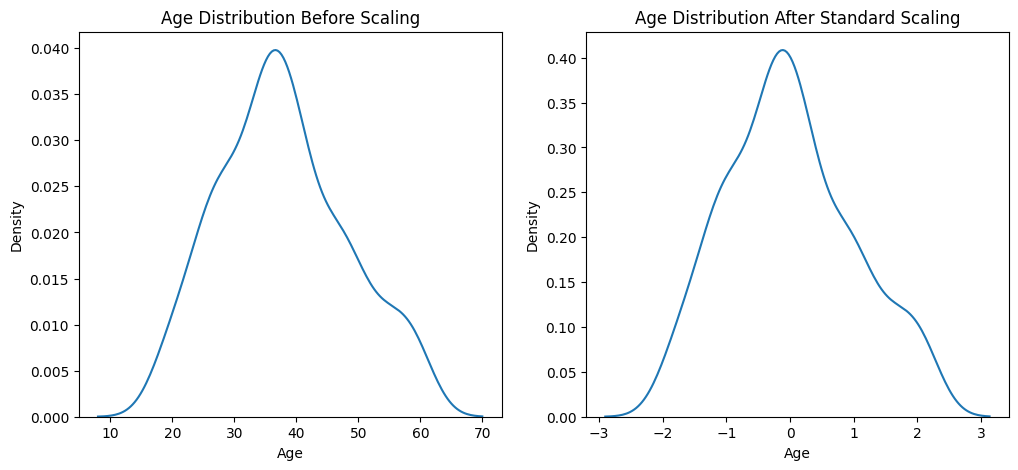

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
plt.show()

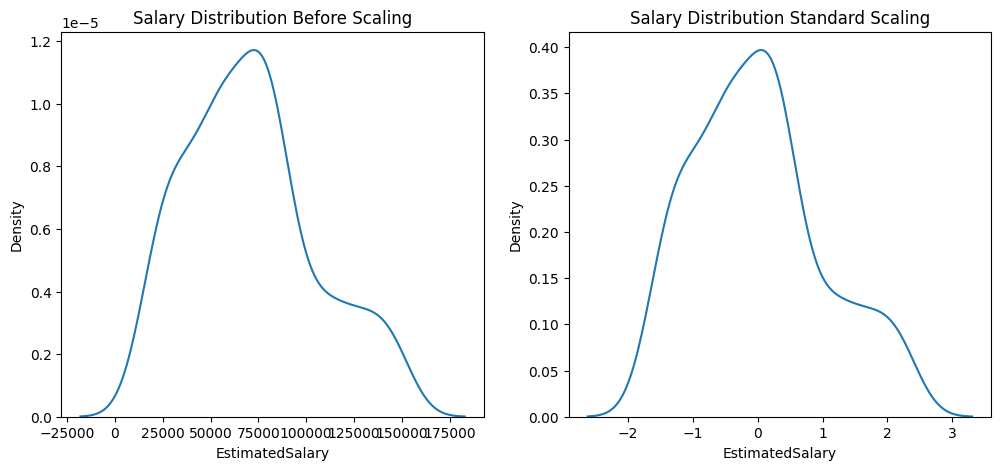

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why Scaling is important

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log_scaled = LogisticRegression()

In [26]:
log.fit(X_train,y_train)
log_scaled.fit(X_train_Scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
ypred = log.predict(X_test)
ypred_scale = log_scaled.predict(X_test_Scaled)

In [28]:
from sklearn.metrics import accuracy_score
print("Actual" , accuracy_score(y_test,ypred))
print("Scaled" , accuracy_score(y_test,ypred_scale))
 # kuch hua nahi lekin Actual me kam aana chaiya or scaled me jyada

Actual 0.825
Scaled 0.8083333333333333


### Effect of Outlier

In [30]:
df = pd.concat(
    [df,
     pd.DataFrame({
         'Age':[5,90,95],
         'EstimatedSalary':[1000,250000,350000],
         'Purchased':[0,1,1]
     })],
    ignore_index=True
)


In [31]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


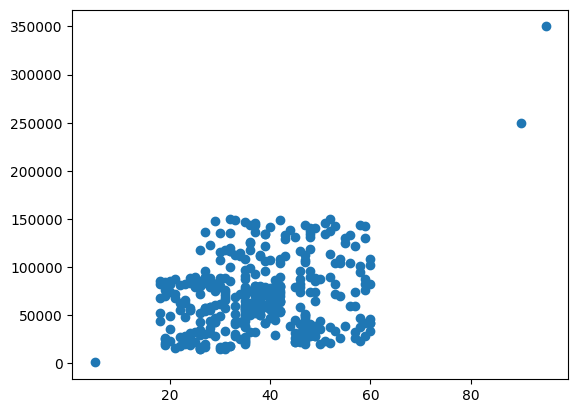

In [32]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [33]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)

(282, 2)
(121, 2)


In [37]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train) 
X_test_scaled=scaler.transform(X_test)

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

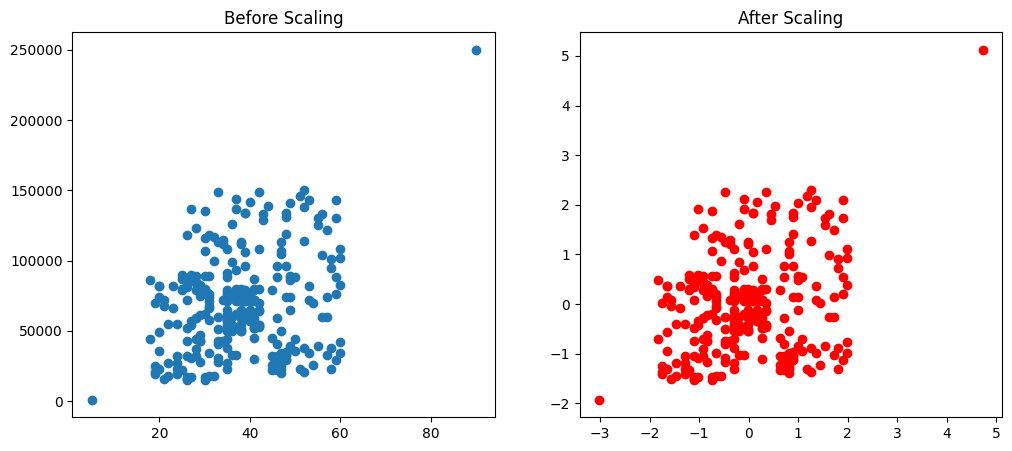

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [ ]:
# Outlire me kuch fark nahi padta hai scale se 
# manually handle karna pagega LOL!!!

### When to use standardization

## Reasons for Applying Feature Scaling

| Algorithm(s) | Reason of applying feature scaling |
| :--- | :--- |
| **1. K-Means** | Use the Euclidean distance measure. |
| **2. K-Nearest-Neighbours** | Measure the distances between pairs of samples and these distances are influenced by the measurement units. |
| **3. Principal Component Analysis (PCA)** | Try to get the feature with maximum variance. |
| **4. Artificial Neural Network** | Apply Gradient Descent. |
| **5. Gradient Descent** | Theta calculation becomes faster after feature scaling and the learning rate in the update equation of Stochastic Gradient Descent is the same for every parameter. |


In [40]:
# PCA me mean centering or varince controle karna padta hai var ! 1